## UCI-Automobile
[UCI-Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('auto-mobile.csv')

print('row:{0}, col:{1}'.format(df.shape[0], df.shape[1]))

row:205, col:26


### 1.Data overview, analysis

#### Data Set Information:

This data set consists of three types of entities: 
(a) the specification of an auto in terms of various characteristics, 
(b) its assigned insurance risk rating, 
(c) its normalized losses in use as compared to other cars. 
The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

#### Dataset's columns

| No | column | explain |
| --: | :-- | :-- |
| 1 |  symboling |  -3, -2, -1, 0, 1, 2, 3 |
| 2 |  normalized-losses |  continuous from 65 to 256 |
| 3 |  make |  alfa-romero, audi, bmw, chevrolet, dodge, honda, <br>isuzu, jaguar, mazda, mercedes-benz, mercury,<br> mitsubishi, nissan, peugot, plymouth, porsche,<br> renault, saab, subaru, toyota, volkswagen, volvo
| 4 |  fuel-type |  diesel, gas |
| 5 |  aspiration |  std, turbo |
| 6 |  num-of-doors |  four, two |
| 7 |  body-style |  hardtop, wagon, sedan, hatchback, convertible |
| 8 |  drive-wheels |  4wd, fwd, rwd |
| 9 |  engine-location |  front, rear |
| 10 |  wheel-base |  continuous from 86 | 6 120 | 9 |
| 11 |  length |  continuous from 141 | 1 to 208 | 1 |
| 12 |  width |  continuous from 60 | 3 to 72 | 3 |
| 13 |  height |  continuous from 47 | 8 to 59 | 8 |
| 14 |  curb-weight |  continuous from 1488 to 4066 |
| 15 |  engine-type |  dohc, dohcv, l, ohc, ohcf, ohcv, rotor |
| 16 |  num-of-cylinders |  eight, five, four, six, three, twelve, two |
| 17 |  engine-size |  continuous from 61 to 326 |
| 18 |  fuel-system |  1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi |
| 19 |  bore |  continuous from 2 | 54 to 3 | 94 |
| 20 |  stroke |  continuous from 2 | 07 to 4 | 17 |
| 21 |  compression-ratio |  continuous from 7 to 23 |
| 22 |  horsepower |  continuous from 48 to 288 |
| 23 |  peak-rpm |  continuous from 4150 to 6600 |
| 24 |  city-mpg |  continuous from 13 to 49 |
| 25 |  highway-mpg |  continuous from 16 to 54 |
| 26 |  price |  continuous from 5118 to 45400 |

In [3]:
display(df.head())
display(df.tail())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
display(pd.concat([df.dtypes, (df == '?').sum()], axis=1).rename(columns={0:'dType', 1:'Missing-Values'}))

,dType,Missing-Values
symboling,int64,0
normalized-losses,object,41
make,object,0
fuel-type,object,0
aspiration,object,0
num-of-doors,object,2
body-style,object,0
drive-wheels,object,0
engine-location,object,0
wheel-base,float64,0


In [5]:
# 欠損値があるデータを落として、新しいデータフレームを生成し、要約する
# 課題の前提事項に従い、symbolingを削除
df_dc = df.copy()
df_dc.drop('symboling', axis=1, inplace=True)
df_dc = df_dc.replace('?', np.nan).dropna(how='any')
display(df_dc.describe())

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,26.522013,32.081761
std,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,6.097142,6.459189
min,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,23.000000,28.000000
50%,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,26.000000,32.000000
75%,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,31.000000,37.000000
max,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


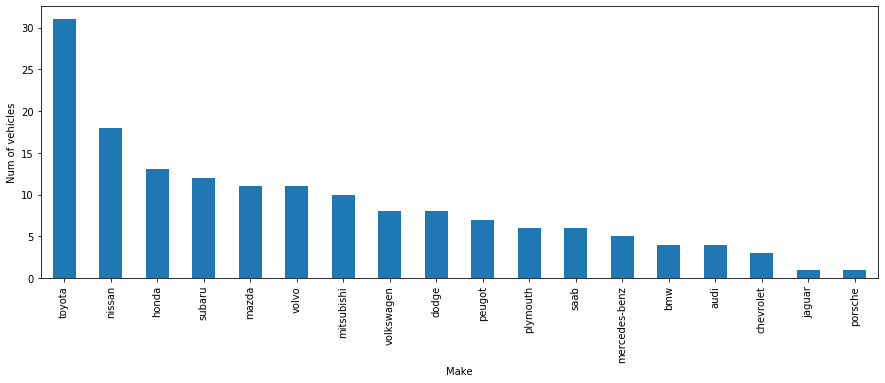

In [6]:
df_dc['make'].value_counts().plot(kind='bar', figsize=(15,5))
plt.ylabel('Num of vehicles')
plt.xlabel('Make');

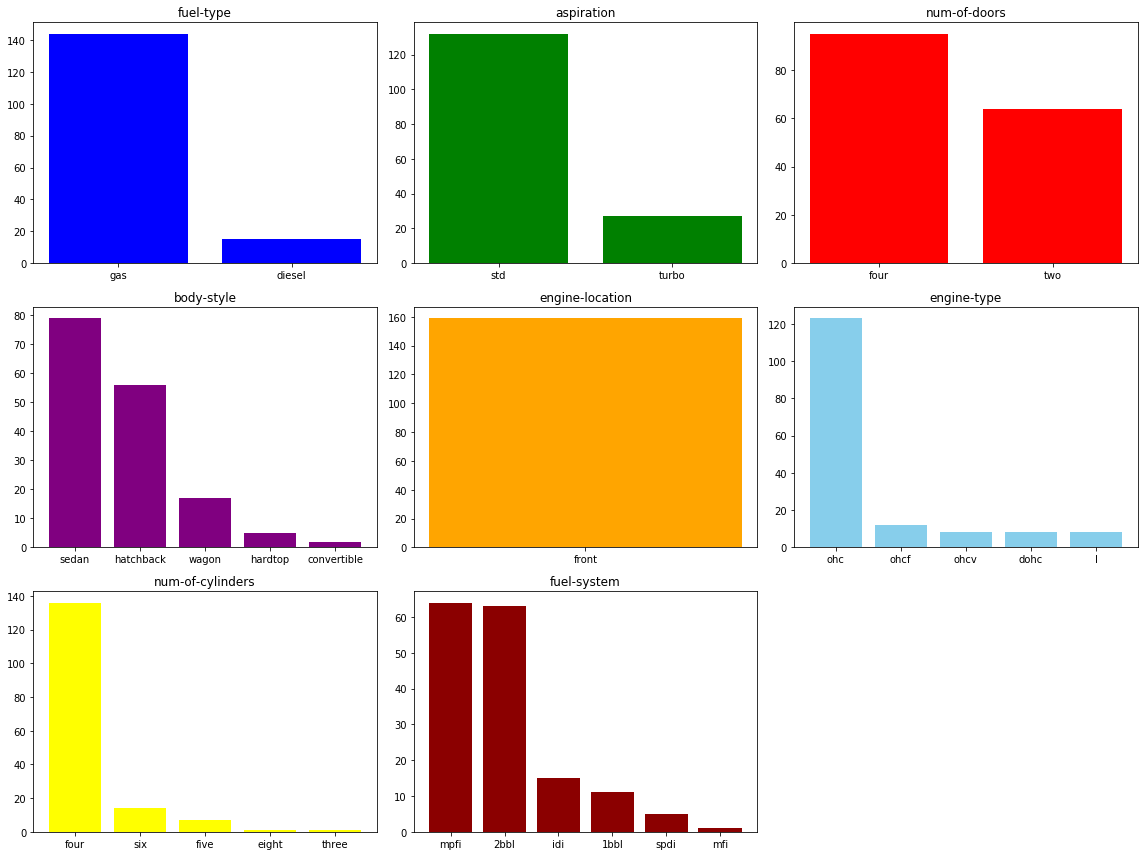

In [7]:
# カテゴリの少ない情報を並列表示
fig = plt.figure(figsize=(16.0, 12.0))

ax_list = []

for i in range(1, 9):
    ax_list.append(fig.add_subplot(3, 3, i))

colors = ["blue", "green", "red", "purple", "orange", "skyblue", "yellow", "darkred"]
labels = ["fuel-type","aspiration","num-of-doors", "body-style", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]

df_list = []

for label in labels:
    df_list.append(DataFrame(df_dc[label].value_counts()))

for ax, df, color, label in zip(ax_list, df_list, colors, labels):
    ax.title.set_text(label)
    ax.bar(df.index, df[label].values, color=color)

fig.tight_layout()              #レイアウトの設定
plt.show()

In [8]:
df_dc = df_dc.astype({'normalized-losses': int, 'bore': float, 'stroke': float, 'horsepower': int, 'peak-rpm': int, 'price': int})
display(df_dc.describe())

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [9]:
df_dc.shape

(159, 25)

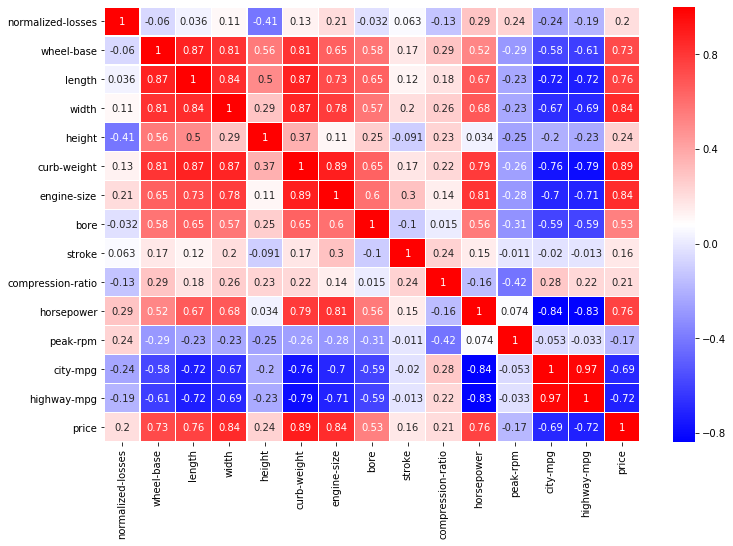

In [10]:
sns.heatmap(df_dc.corr(), annot=True, cmap='bwr', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

### 2.Preprocess
#### Feature Scaling

In [11]:
type_num_list = []
for i, c in zip(df_dc.dtypes.index, df_dc.dtypes):
    if c != 'object':
        type_num_list.append(i)
        
print(type_num_list)

['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [12]:
# 先頭項目が目的変数なのでdrop
del type_num_list[0]

type_num_list

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [13]:
scaler = StandardScaler()
df_list = []

for col_name in type_num_list:
    df_list.append(DataFrame(scaler.fit_transform(df_dc[[col_name]])).rename(columns={0: col_name}))
    
df_list

[     wheel-base
 0      0.298157
 1      0.220504
 2      1.462948
 3      1.462948
 4      0.569942
 5      0.569942
 6      0.569942
 7      0.569942
 8     -1.914945
 9     -0.730741
 10    -0.730741
 11    -0.886047
 12    -0.886047
 13    -0.886047
 14    -0.886047
 15    -0.886047
 16    -0.886047
 17     0.977618
 18    -0.458957
 19    -2.264382
 20    -2.264382
 21    -0.886047
 22    -0.886047
 23    -0.886047
 24    -0.342478
 25    -0.342478
 26    -0.342478
 27    -0.342478
 28    -0.342478
 29    -0.342478
 ..          ...
 129    0.026373
 130    0.026373
 131    0.026373
 132    0.802900
 133    0.802900
 134    0.802900
 135    0.802900
 136    0.802900
 137    0.899966
 138    0.899966
 139    1.210576
 140   -0.187172
 141   -0.187172
 142   -0.187172
 143   -0.187172
 144   -0.187172
 145   -0.187172
 146   -0.187172
 147   -0.730741
 148    1.171750
 149    1.171750
 150    1.171750
 151    1.171750
 152    1.171750
 153    1.171750
 154    2.103582
 155    2.1035

In [14]:
for col_name in type_num_list:
    df_dc.drop(col_name, axis=1, inplace=True)
    
df_dc2 = df_dc.copy()
for d, c in zip(df_list, type_num_list):
    df_dc2[c] = d.values
    
df_dc2

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,...,-0.258394,-0.336785,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,0.427398
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,...,0.755296,0.552401,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,1.024734
6,158,audi,gas,std,four,sedan,fwd,front,ohc,five,...,0.796925,0.552401,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,1.069108
8,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,...,1.300648,0.387737,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,2.121274
10,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,...,-0.137667,-0.369717,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.850653
11,192,bmw,gas,std,four,sedan,rwd,front,ohc,four,...,-0.137667,-0.369717,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.935134
12,188,bmw,gas,std,two,sedan,rwd,front,ohc,six,...,0.518005,1.474520,0.037052,-0.157683,-0.299475,0.821751,-1.860562,-0.908534,-0.633928,1.625484
13,188,bmw,gas,std,four,sedan,rwd,front,ohc,six,...,0.632487,1.474520,0.037052,-0.157683,-0.299475,0.821751,-1.860562,-0.908534,-0.633928,1.648524
18,121,chevrolet,gas,std,two,hatchback,fwd,front,l,three,...,-2.025585,-1.917560,-1.463922,-0.701976,-0.170517,-1.562169,-0.029802,3.369232,3.248756,-1.074306
19,98,chevrolet,gas,std,two,hatchback,fwd,front,ohc,four,...,-1.222127,-0.962508,-1.013629,-0.429829,-0.144725,-0.843727,0.616349,1.888467,1.695683,-0.879063


#### Add a new feature
Make the head office address a new feature 'country'.

In [15]:
make_list = list(set([ make for make in df_dc2['make']]))
make_list.sort()
print('make\'s length: {}'.format(len(make_list)))
make_list

make's length: 18


['audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [16]:
country_list = ['Germany', 'Germany', 'America', 'America', 'Japan', 'England', 'Japan'
                , 'Germany', 'Japan', 'Japan', 'France', 'England', 'Germany', 'Sweden', 'Japan', 'Japan', 'Germany', 'Sweden']
print('Length of list: {}'.format(len(country_list)))
print('Num of non-overlapping countries: {}'.format(len(set(country_list))))
country_list

Length of list: 18
Num of non-overlapping countries: 6


['Germany',
 'Germany',
 'America',
 'America',
 'Japan',
 'England',
 'Japan',
 'Germany',
 'Japan',
 'Japan',
 'France',
 'England',
 'Germany',
 'Sweden',
 'Japan',
 'Japan',
 'Germany',
 'Sweden']

In [17]:
make_country_dict = dict(zip(make_list, country_list))
make_country_dict

{'audi': 'Germany',
 'bmw': 'Germany',
 'chevrolet': 'America',
 'dodge': 'America',
 'honda': 'Japan',
 'jaguar': 'England',
 'mazda': 'Japan',
 'mercedes-benz': 'Germany',
 'mitsubishi': 'Japan',
 'nissan': 'Japan',
 'peugot': 'France',
 'plymouth': 'England',
 'porsche': 'Germany',
 'saab': 'Sweden',
 'subaru': 'Japan',
 'toyota': 'Japan',
 'volkswagen': 'Germany',
 'volvo': 'Sweden'}

In [18]:
countries = []
for make in df_dc2['make']:
    if make in make_country_dict:
        countries.append(make_country_dict[make])
df_dc2['country'] = countries
display(df_dc2.head())
display(df_dc2.tail())

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,country
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,...,-0.336785,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,0.427398,Germany
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,...,0.552401,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,1.024734,Germany
6,158,audi,gas,std,four,sedan,fwd,front,ohc,five,...,0.552401,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,1.069108,Germany
8,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,...,0.387737,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,2.121274,Germany
10,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,...,-0.369717,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.850653,Germany


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,country
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,...,0.717065,1.800697,-0.293756,-0.170517,0.593156,0.616349,-0.579475,-0.633928,0.921480,Sweden
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,...,0.717065,1.800697,-0.293756,-0.376850,2.095352,0.400966,-1.237593,-1.099850,1.296949,Sweden
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,...,1.770915,1.050210,-1.246270,-0.351058,1.246285,0.831733,-1.402122,-1.410464,1.713378,Sweden
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,...,0.848797,-1.088678,0.556703,3.311356,0.331904,-0.675952,-0.085886,-0.789235,1.881486,Sweden
204,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,...,0.717065,1.800697,-0.293756,-0.170517,0.593156,0.616349,-1.237593,-1.099850,1.907939,Sweden


#### Consider the effects of multicollinearity
多重共線性の影響を確認し、不要な変数をドロップ

In [19]:
df_dc2.dtypes

normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
engine-type           object
num-of-cylinders      object
fuel-system           object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
country               object
dtype: object

In [20]:
df_dc2.iloc[:, 11:25]

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.298157,0.364430,0.305113,0.177143,-0.258394,-0.336785,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,0.427398
4,0.220504,0.364430,0.408113,0.177143,0.755296,0.552401,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,1.024734
6,1.462948,1.766029,2.983113,0.796169,0.796925,0.552401,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,1.069108
8,1.462948,1.766029,2.983113,0.884602,1.300648,0.387737,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,2.121274
10,0.569942,0.381841,-0.415887,0.177143,-0.137667,-0.369717,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.850653
11,0.569942,0.381841,-0.415887,0.177143,-0.137667,-0.369717,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,0.935134
12,0.569942,0.381841,-0.415887,0.177143,0.518005,1.474520,0.037052,-0.157683,-0.299475,0.821751,-1.860562,-0.908534,-0.633928,1.625484
13,0.569942,0.381841,-0.415887,0.177143,0.632487,1.474520,0.037052,-0.157683,-0.299475,0.821751,-1.860562,-0.908534,-0.633928,1.648524
18,-1.914945,-2.726052,-2.733387,-0.309235,-2.025585,-1.917560,-1.463922,-0.701976,-0.170517,-1.562169,-0.029802,3.369232,3.248756,-1.074306
19,-0.730741,-1.437626,-1.033887,-0.839829,-1.222127,-0.962508,-1.013629,-0.429829,-0.144725,-0.843727,0.616349,1.888467,1.695683,-0.879063


    VIF Factor           features
0     1.029831  normalized-losses
1     6.372245         wheel-base
2     8.459536             length
3     6.163781              width
4     2.317611             height
5    17.764224        curb-weight
6     9.537113        engine-size
7     2.330479               bore
8     1.529911             stroke
9     2.547069  compression-ratio
10    7.317174         horsepower
11    1.936235           peak-rpm
12   23.997885           city-mpg
13   22.086532        highway-mpg
14    6.628157              price


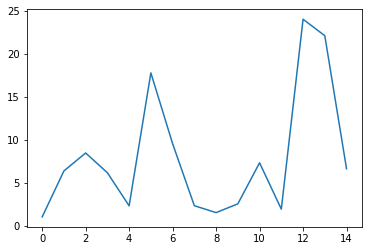

In [21]:
# vifを計算
# pd.concat([df_dc.iloc[:, 0:1], df_dc.iloc[:, 8:13], df_dc.iloc[:, 15:16], df_dc.iloc[:, 17:25]], axis=1).dtypes
df_nbr = pd.concat([df_dc2.iloc[:, 0:1], df_dc2.iloc[:, 11:25]], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_nbr.values, i) for i in range(df_nbr.shape[1])]
vif["features"] = df_nbr.columns
 
print(vif)
 
plt.plot(vif["VIF Factor"])

In [22]:
df_dc2.drop("curb-weight", axis=1, inplace=True)
df_dc2.drop("city-mpg", axis=1, inplace=True)
df_dc2.drop("highway-mpg", axis=1, inplace=True)

In [23]:
# one-hot-encoding
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["make"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["fuel-type"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["aspiration"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["num-of-doors"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["body-style"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["drive-wheels"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["engine-type"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["num-of-cylinders"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["fuel-system"])], axis=1)
df_dc2 = pd.concat([df_dc2, pd.get_dummies(df_dc2["country"])], axis=1)

df_dc2.drop("make", axis=1, inplace=True)
df_dc2.drop("fuel-type", axis=1, inplace=True)
df_dc2.drop("aspiration", axis=1, inplace=True)
df_dc2.drop("num-of-doors", axis=1, inplace=True)
df_dc2.drop("body-style", axis=1, inplace=True)
df_dc2.drop("drive-wheels", axis=1, inplace=True)
df_dc2.drop("engine-location", axis=1, inplace=True)
df_dc2.drop("engine-type", axis=1, inplace=True)
df_dc2.drop("num-of-cylinders", axis=1, inplace=True)
df_dc2.drop("fuel-system", axis=1, inplace=True)
df_dc2.drop("country", axis=1, inplace=True)

df_dc2.head()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,horsepower,...,idi,mfi,mpfi,spdi,America,England,France,Germany,Japan,Sweden
3,164,0.298157,0.364430,0.305113,0.177143,-0.336785,-0.413240,0.556703,-0.041559,0.201279,...,0,0,1,0,0,0,0,1,0,0
4,164,0.220504,0.364430,0.408113,0.177143,0.552401,-0.413240,0.556703,-0.557392,0.625812,...,0,0,1,0,0,0,0,1,0,0
6,158,1.462948,1.766029,2.983113,0.796169,0.552401,-0.413240,0.556703,-0.428433,0.462530,...,0,0,1,0,0,0,0,1,0,0
8,158,1.462948,1.766029,2.983113,0.884602,0.387737,-0.638386,0.556703,-0.480017,1.442223,...,0,0,1,0,0,0,0,1,0,0
10,192,0.569942,0.381841,-0.415887,0.177143,-0.369717,0.750015,-1.484399,-0.351058,0.168622,...,0,0,1,0,0,0,0,1,0,0


### 3.Model Create

#### Linear Regression

In [24]:
# ID系を除いてすべてを適用した場合のトレーニングデータ
X_train, X_valid, y_train, y_valid = train_test_split(df_dc2.iloc[:, 1:].values, df_dc2['normalized-losses'].values, test_size=0.2, random_state=42)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_valid, y_valid))

y_pred = lr.predict(X_valid)
mean_squared_error(y_valid, y_pred)

0.40958961421924156


949.776582313406

#### Ridge Regression

In [26]:
reg = Ridge(alpha=4.0)  
reg.fit(X_train, y_train)
print(reg.score(X_valid, y_valid))

y_pred = reg.predict(X_valid)
mean_squared_error(y_valid, y_pred)

0.5339122139949806


749.7823126272933

In [27]:
alpha_list = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

for alpha in np.arange(0.1, 10.0, 0.1):
    print("alpha: {}".format(alpha))
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    print("score: {}".format(reg.score(X_valid, y_valid)))
    
    y_pred = reg.predict(X_valid)
    print("MSE: {}".format(mean_squared_error(y_valid, y_pred)))
    print("-"*20)


alpha: 0.1
score: 0.43002508164136316
MSE: 916.9026206189602
--------------------
alpha: 0.2
score: 0.4450454064666768
MSE: 892.7398465191139
--------------------
alpha: 0.30000000000000004
score: 0.45686080118580313
MSE: 873.7327533424318
--------------------
alpha: 0.4
score: 0.46652153275098496
MSE: 858.1918061815991
--------------------
alpha: 0.5
score: 0.474613805838198
MSE: 845.17399406138
--------------------
alpha: 0.6
score: 0.48150775791732287
MSE: 834.0838872440943
--------------------
alpha: 0.7000000000000001
score: 0.4874551720863748
MSE: 824.5164493413638
--------------------
alpha: 0.8
score: 0.49263615037116926
MSE: 816.1819552896293
--------------------
alpha: 0.9
score: 0.4971843754317597
MSE: 808.8653535534874
--------------------
alpha: 1.0
score: 0.5012019723438721
MSE: 802.4023583958851
--------------------
alpha: 1.1
score: 0.5047687910459484
MSE: 796.6645174666309
--------------------
alpha: 1.2000000000000002
score: 0.5079484754206134
MSE: 791.5494486417304
-

In [28]:
df_coef = pd.concat([DataFrame(df_dc2.iloc[:, 1:].columns).rename(columns = {0: 'col-name'}), DataFrame(np.round(reg.coef_, 1)).rename(columns = {0: 'coef'})], axis=1)
df_coef[df_coef['coef'] != 0]

,col-name,coef
0,wheel-base,-5.9
1,length,9.3
2,width,-0.5
3,height,-9.1
4,engine-size,-2.3
5,bore,-4.1
6,stroke,-0.6
7,compression-ratio,-1.1
8,horsepower,3.5
9,peak-rpm,5.1


In [29]:
# 特徴量を減らしながら確認を行う
selector = SelectKBest(score_func=f_regression, k=30) 
selector.fit(X_train, y_train)
mask = selector.get_support()    # 各特徴量を選択したか否かのmaskを取得
df_mask = pd.concat([DataFrame(df_dc2.iloc[:, 1:].columns).rename(columns={0:"column"}), DataFrame(mask).rename(columns={0: "mask"})], axis=1)
display(df_mask[df_mask["mask"] == True])

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X_train)
print("X.shape={}, X_selected.shape={}".format(X_train.shape, X_selected.shape))

,column,mask
3,height,True
4,engine-size,True
7,compression-ratio,True
8,horsepower,True
9,peak-rpm,True
10,price,True
11,audi,True
12,bmw,True
19,mitsubishi,True
21,peugot,True


X.shape=(127, 65), X_selected.shape=(127, 30)
